In [1]:
import numpy as np # Scientific library for numerical programming.
import matplotlib.pyplot as plt # Plotting library.
import matplotlib
%matplotlib inline

In [2]:
def onehot(t, num_classes):
    out = np.zeros((t.shape[0], num_classes))
    for row, col in enumerate(t):
        out[row, col] = 1
    return out

data = np.load('mnist.npz')
num_classes = 10
x_train = data['X_train'][:2000]
targets_train = data['y_train'][:2000]
targets_train = onehot(targets_train, num_classes)

x_valid = data['X_valid'][:500]
targets_valid = data['y_valid'][:500]
targets_valid = onehot(targets_valid, num_classes)

x_test = data['X_test'][:500]
targets_test = data['y_test'][:500]
targets_test = onehot(targets_test, num_classes)


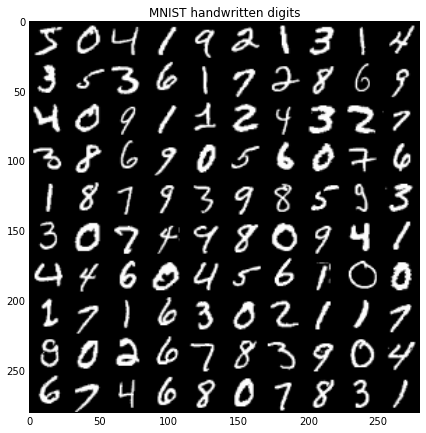

In [3]:
idx = 0
canvas = np.zeros((28*10, 10*28))
for i in range(10):
    for j in range(10):
        canvas[i*28:(i+1)*28, j*28:(j+1)*28] = x_train[idx].reshape((28, 28))
        idx += 1
plt.figure(figsize=(7, 7))
plt.imshow(canvas, cmap='gray')
plt.title('MNIST handwritten digits')
plt.show()

In [4]:
print "One-of-k" + " "*34  + "| Label"
print "-"*50
for i in range(10):
   print targets_train[i], "|",  targets_train[i].argmax(axis=-1)

One-of-k                                  | Label
--------------------------------------------------
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.] | 5
[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.] | 0
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.] | 4
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.] | 1
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.] | 9
[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.] | 2
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.] | 1
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.] | 3
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.] | 1
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.] | 4


In [5]:
class LinearLayer():
    def __init__(self, num_inputs, num_units, scale=0.01):
        self.num_units = num_units
        self.num_inputs = num_inputs
        self.W = np.random.random((num_inputs, num_units)) * scale
        self.b = np.zeros(num_units)

    def __str__(self): 
        return "LinearLayer(%i, %i)" % (self.num_inputs, self.num_units)

    def fprop(self, x, *args):
        self.x = x
        self.a = np.dot(x, self.W) + self.b
        return self.a
        
    def bprop(self, delta_in):
        x_t = np.transpose(self.x)
        self.grad_W = np.dot(x_t, delta_in)
        self.grad_b = delta_in.sum(axis=0)
        W_T = np.transpose(self.W)
        self.delta_out = np.dot(delta_in,W_T)
        return self.delta_out
        
    def update_params(self, lr):
        self.W = self.W - self.grad_W*lr
        self.b = self.b - self.grad_b*lr

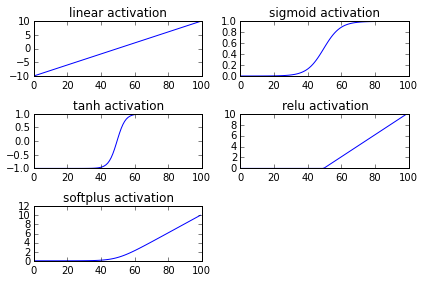

In [6]:
def linear(x):
    return x

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return (np.exp(x)-np.exp(-x)) / (np.exp(x)+np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def softplus(x):
    return np.log(np.exp(x) + 1)

x = np.linspace(-10,10,100)

plt.subplot(321)
plt.plot(linear(x))
plt.title('linear activation')
plt.subplot(322)
plt.plot(sigmoid(x))
plt.title('sigmoid activation')
plt.subplot(323)
plt.plot(tanh(x))
plt.title('tanh activation')
plt.subplot(324)
plt.plot(relu(x))
plt.title('relu activation')
plt.subplot(325)
plt.plot(softplus(x))
plt.title('softplus activation')
plt.tight_layout()
plt.show()

In [7]:
class SigmoidActivationLayer():
    def __str__(self): 
        return "Sigmoid()"
    
    def fprop(self, x, train=True):
        self.a = 1.0 / (1+np.exp(-x))
        return self.a
        
    def bprop(self, delta_in):
        delta_out = self.a * (1 - self.a)*delta_in
        return delta_out
        
    def update_params(self, lr):
        pass
    
class TanhActivationLayer():
    def __str__(self):
        return "Tanh()"

    def fprop(self, x, train=True):
        self.a = np.tanh(x)
        return self.a

    def bprop(self, delta_in):
        return (1-self.a**2)*delta_in

    def update_params(self, lr):
        pass

class ReluActivationLayer():
    def __str__(self): 
        return "ReLU()"

    def fprop(self, x, train=True):
        self.a = np.maximum(0, x)
        return self.a
        
    def bprop(self, delta_in):
        return delta_in * (self.a > 0).astype(self.a.dtype)
        
    def update_params(self, lr):
        pass
    
class SoftplusActivationLayer():
    def __str__(self):
        return "Softplus()"

    def fprop(self, x, train=True):
        self.g = np.exp(x) + 1
        self.a = np.log(g)
        return self.a

    def bprop(self, delta_in):
        return delta_in * 1-g**(-1)

    def update_params(self, lr):
        pass

In [8]:
class SoftmaxActivationLayer():
    def __str__(self): 
        return "Softmax()"
    
    def fprop(self, x, train=True):
        x_exp = np.exp(x)
        normalizer = x_exp.sum(axis=-1, keepdims=True)
        self.a = x_exp / normalizer
        return self.a
        
    def bprop(self, delta_in):
        return delta_in
        
    def update_params(self, lr):
        pass

In [9]:
class MeanSquaredLoss():
    def __str__(self): 
        return "MeanSquaredLoss()"
    
    def fprop(self, x, t):
        num_batches = x.shape[0]
        cost = 0.5 * (x-t)**2   # samples, num_outputs
        cost = cost.sum()  # sum over output and batches
        return cost / num_batches  # divide by batchsize
               
    def bprop(self, y, t):
        num_batches = x.shape[0]
        delta_out = (1./num_batches) * (y-t)
        return delta_out
        
    def update_params(self):
        pass

class CrossEntropyLoss():
    def __str__(self): 
        return "CrossEntropyLoss()"
    
    def fprop(self, x, t):
        tol = 1e-8
        num_batches = x.shape[0]
        cost = np.sum(-t * np.log(x + tol), axis=-1)
        return cost / num_batches  # divide by batchsize
        
    def bprop(self, y, t):
        num_batches = y.shape[0]
        delta_out = (1./num_batches) * (y-t)
        return delta_out
        
    def update_params(self):
        pass

In [10]:
num_samples, num_inputs = x_train.shape
num_hidden_units = 100
num_classes = 10

l_hid_pre1 = LinearLayer(num_inputs, num_hidden_units) 
l_hid_act1 = ReluActivationLayer()
l_hid_pre2 = LinearLayer(num_hidden_units, num_classes)
l_hid_act2 = SoftmaxActivationLayer()

LossLayer = CrossEntropyLoss()

def forward(x):
    out_hid_pre1 = l_hid_pre1.fprop(x)
    out_hid_act1 = l_hid_act1.fprop(out_hid_pre1)
    out_hid_pre2 = l_hid_pre2.fprop(out_hid_act1)
    y_probs = l_hid_act2.fprop(out_hid_pre2)
    return y_probs

def backward(y_probs, targets):
    delta1 = LossLayer.bprop(y_probs, targets)
    delta2 = l_hid_act2.bprop(delta1)
    delta3 = l_hid_pre2.bprop(delta2)
    delta4 = l_hid_act1.bprop(delta3)
    delta5 = l_hid_pre1.bprop(delta4)
    
def update(learning_rate):
    l_hid_pre1.update_params(learning_rate)
    l_hid_pre2.update_params(learning_rate)
    

In [11]:
from confusionmatrix import ConfusionMatrix
batch_size = 100
num_epochs = 10
learning_rate = 0.1
num_samples = x_train.shape[0]
num_batches = num_samples // batch_size


train_acc, train_loss = [], []
valid_acc, valid_loss = [], []
test_acc, test_loss = [], []
batch_loss = []
for epoch in range(num_epochs):
    #Forward->Backprob->Update params
    for i in range(num_batches):
        idx = range(i*batch_size, (i+1)*batch_size)
        x_batch = x_train[idx]
        target_batch = targets_train[idx]
        y_probs = forward(x_batch)
        batch_loss_cur = LossLayer.fprop(y_probs, target_batch)
        batch_loss += [batch_loss_cur]
        backward(y_probs, target_batch)
        update(learning_rate)

    #Measure performance
    confusion_train = ConfusionMatrix(num_classes)
    confusion_valid = ConfusionMatrix(num_classes)
    confusion_test = ConfusionMatrix(num_classes)
    
    y_train_probs = forward(x_train)
    train_loss_cur = LossLayer.fprop(y_train_probs, targets_train)
    confusion_train.batch_add(targets_train.argmax(-1), y_train_probs.argmax(-1))
    train_acc_cur = confusion_train.accuracy()
    train_acc += [train_acc_cur]
    train_loss += [train_loss_cur.mean()]

    y_valid_probs = forward(x_valid)
    valid_loss_cur = LossLayer.fprop(y_valid_probs, targets_valid)
    confusion_valid.batch_add(targets_valid.argmax(-1), y_valid_probs.argmax(-1))
    valid_acc_cur = confusion_valid.accuracy()
    valid_acc += [valid_acc_cur]
    valid_loss += [valid_loss_cur.mean()]
    
    y_test_probs = forward(x_test)
    test_loss_cur = LossLayer.fprop(y_test_probs, targets_test)
    confusion_test.batch_add(targets_test.argmax(-1), y_test_probs.argmax(-1))
    test_acc_cur = confusion_test.accuracy()
    test_acc += [test_acc_cur]
    test_loss += [test_loss_cur.mean()]
    
    print "Epoch %i : Train Loss %e , Train acc %f,  Valid acc %f " \
    % (epoch+1, np.mean(train_loss_cur), train_acc_cur, valid_acc_cur)


Epoch 1 : Train Loss 1.139633e-03 , Train acc 0.095500,  Valid acc 0.106000 
Epoch 2 : Train Loss 1.115221e-03 , Train acc 0.102000,  Valid acc 0.108000 
Epoch 3 : Train Loss 1.027921e-03 , Train acc 0.388500,  Valid acc 0.382000 
Epoch 4 : Train Loss 8.332726e-04 , Train acc 0.613500,  Valid acc 0.608000 
Epoch 5 : Train Loss 6.226057e-04 , Train acc 0.698500,  Valid acc 0.682000 
Epoch 6 : Train Loss 4.900818e-04 , Train acc 0.769500,  Valid acc 0.722000 
Epoch 7 : Train Loss 4.071604e-04 , Train acc 0.803000,  Valid acc 0.756000 
Epoch 8 : Train Loss 3.499901e-04 , Train acc 0.824500,  Valid acc 0.768000 
Epoch 9 : Train Loss 3.085080e-04 , Train acc 0.843000,  Valid acc 0.792000 
Epoch 10 : Train Loss 2.774449e-04 , Train acc 0.859500,  Valid acc 0.810000 


  ----------------------------------
 0 | 38  0  0  0  0  4  0  0  0  0 |42
 1 |  0 66  0  0  0  0  0  0  1  0 |67
 2 |  0  0 49  1  0  0  0  3  2  0 |55
 3 |  0  0  1 33  0  7  0  3  1  0 |45
 4 |  0  0  0  0 40  0  3  0  0 12 |55
 5 |  1  0  0  3  0 37  3  1  1  4 |50
 6 |  2  0  4  0  3  2 32  0  0  0 |43
 7 |  0  2  0  0  0  0  0 37  2  8 |49
 8 |  0  0  1  1  1  4  1  1 29  2 |40
 9 |  0  1  1  1  8  0  0  2  3 38 |54
  ----------------------------------
     41 69 56 39 52 54 39 47 39 64



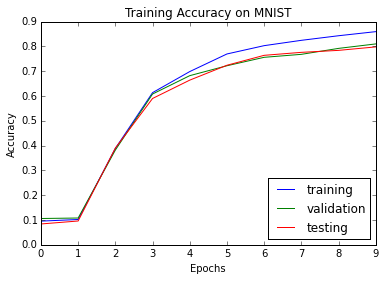

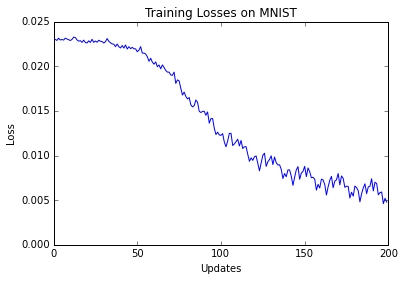

In [12]:
print confusion_test
plt.plot(range(num_epochs), train_acc, label='training')
plt.plot(range(num_epochs), valid_acc, label='validation')
plt.plot(range(num_epochs), test_acc, label='testing')
plt.title('Training Accuracy on MNIST')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc=4)
plt.show()

plt.plot(np.mean(batch_loss,axis=1))
plt.title('Training Losses on MNIST')
plt.xlabel('Updates')
plt.ylabel('Loss')
plt.show()

In [13]:
class DropoutLayer():
    def __str__(self): 
        return "Dropout(%f)" % self.p

    def __init__(self, p=0.5):
        self.p = p

    def fprop(self, x, train=True):
        if train:
            mask = np.random.random(x.shape) > (1-self.p)
            scale = 1.0 / (1-self.p)            
            self.a = x*mask*scale
            return self.a 
        else:
            return x 

    def bprop(self, delta_in):
        delta_out = delta_in*self.a
        return delta_out

    def update_params(self, lr):
        pass

In [14]:
num_samples, num_inputs = x_train.shape
num_hidden_units = 100
num_classes = 10

l_hid_pre1 = LinearLayer(num_inputs, num_hidden_units)
l_hid_act1 = ReluActivationLayer()
l_hid_pre2 = LinearLayer(num_hidden_units, num_classes)
l_hid_act2 = SoftmaxActivationLayer()

LossLayer = CrossEntropyLoss()

def forward(x):
    out_hid_pre1 = l_hid_pre1.fprop(x)
    out_hid_act1 = l_hid_act1.fprop(out_hid_pre1)
    out_hid_pre2 = l_hid_pre2.fprop(out_hid_act1)
    y_probs = l_hid_act2.fprop(out_hid_pre2)
    return y_probs

def forward_eval(x):
    out_hid_pre1 = l_hid_pre1.fprop(x)
    out_hid_act1 = l_hid_act1.fprop(out_hid_pre1)
    out_hid_pre2 = l_hid_pre2.fprop(out_hid_act1)
    y_probs = l_hid_act2.fprop(out_hid_pre2)
    return y_probs

def backward(y_probs, targets):
    delta1 = LossLayer.bprop(y_probs, targets)
    delta2 = l_hid_act2.bprop(delta1)
    delta3 = l_hid_pre2.bprop(delta2)
    delta4 = l_hid_act1.bprop(delta3)
    delta5 = l_hid_pre1.bprop(delta4)
    
def update(learning_rate):
    l_hid_pre1.update_params(learning_rate)
    l_hid_pre2.update_params(learning_rate)

In [16]:
num_samples, num_inputs = x_train.shape
num_hidden_units = 100
num_classes = 10

l_hid_pre1 = LinearLayer(num_inputs, num_hidden_units)
l_hid_act1 = ReluActivationLayer()
l_hid_dro1 = DropoutLayer()
l_hid_pre2 = LinearLayer(num_hidden_units, num_classes)
l_hid_act2 = SoftmaxActivationLayer()

LossLayer = CrossEntropyLoss()

def forward(x):
    out_hid_pre1 = l_hid_pre1.fprop(x)
    out_hid_act1 = l_hid_act1.fprop(out_hid_pre1)
    out_hid_dro1 = l_hid_dro1.fprop(out_hid_act1)
    out_hid_pre2 = l_hid_pre2.fprop(out_hid_dro1)
    y_probs = l_hid_act2.fprop(out_hid_pre2)
    return y_probs

def forward_eval(x):
    out_hid_pre1 = l_hid_pre1.fprop(x)
    out_hid_act1 = l_hid_act1.fprop(out_hid_pre1)
    out_hid_dro1 = l_hid_dro1.fprop(out_hid_act1, train = False)
    out_hid_pre2 = l_hid_pre2.fprop(out_hid_dro1)
    y_probs = l_hid_act2.fprop(out_hid_pre2)
    return y_probs

def backward(y_probs, targets):
    delta1 = LossLayer.bprop(y_probs, targets)
    delta2 = l_hid_act2.bprop(delta1)
    delta3 = l_hid_pre2.bprop(delta2)
    delta4 = l_hid_dro1.bprop(delta3)
    delta5 = l_hid_act1.bprop(delta4)
    delta6 = l_hid_pre1.bprop(delta5)
    
def update(learning_rate):
    l_hid_pre1.update_params(learning_rate)
    l_hid_pre2.update_params(learning_rate)

In [17]:
from confusionmatrix import ConfusionMatrix
batch_size = 200
num_epochs = 100
learning_rate = 0.1
num_samples = x_train.shape[0]
num_batches = num_samples // batch_size

x_valid = data['X_valid']
targets_valid = data['y_valid']
targets_valid = onehot(targets_valid, num_classes)

x_test = data['X_test']
targets_test = data['y_test']
targets_test = onehot(targets_test, num_classes)

acc, losses = [], []
test_acc, test_loss = [], []
valid_acc, valid_loss = [], []
for epoch in range(num_epochs):
    confusion = ConfusionMatrix(num_classes)
    for i in range(num_batches):
        idx = range(i*batch_size, (i+1)*batch_size)
        x_batch = x_train[idx]
        target_batch = targets_train[idx]
        y_probs = forward(x_batch)
        loss = LossLayer.fprop(y_probs, target_batch)
        losses += [loss]
        backward(y_probs, target_batch)
        update(learning_rate)
        confusion.batch_add(target_batch.argmax(-1), y_probs.argmax(-1))
    
    confusion_valid = ConfusionMatrix(num_classes)
    y_valid_probs = forward_eval(x_valid)
    loss_valid = LossLayer.fprop(y_valid_probs, targets_valid)
    valid_loss += [loss_valid]
    confusion_valid.batch_add(targets_valid.argmax(-1), y_valid_probs.argmax(-1))
    valid_curr_acc = confusion_valid.accuracy()
    valid_acc += [valid_curr_acc]

    confusion_test = ConfusionMatrix(num_classes)
    y_test_probs = forward_eval(x_test)
    loss_test = LossLayer.fprop(y_test_probs, targets_test)
    test_loss += [loss_test]
    confusion_test.batch_add(targets_test.argmax(-1), y_test_probs.argmax(-1))
    test_curr_acc = confusion_test.accuracy()
    test_acc += [test_curr_acc]
    
    curr_acc = confusion.accuracy()
    print "Epoch %i : Train loss,acc: %f, %f; Valid loss,acc: %f, %f; Test loss,acc: %f, %f." % (epoch+1, np.mean(loss), curr_acc, np.mean(loss_valid), valid_curr_acc, np.mean(loss_test), test_curr_acc)
    acc += [curr_acc]

Epoch 1 : Train loss,acc: 0.011443, 0.098500; Valid loss,acc: 0.000229, 0.099100; Test loss,acc: 0.000229, 0.098000.
Epoch 2 : Train loss,acc: 0.011396, 0.101000; Valid loss,acc: 0.000228, 0.099100; Test loss,acc: 0.000228, 0.098000.
Epoch 3 : Train loss,acc: 0.011389, 0.114000; Valid loss,acc: 0.000227, 0.099100; Test loss,acc: 0.000227, 0.098100.
Epoch 4 : Train loss,acc: 0.011301, 0.120000; Valid loss,acc: 0.000225, 0.099900; Test loss,acc: 0.000225, 0.099500.
Epoch 5 : Train loss,acc: 0.011183, 0.145500; Valid loss,acc: 0.000222, 0.116600; Test loss,acc: 0.000223, 0.112000.
Epoch 6 : Train loss,acc: 0.010932, 0.186000; Valid loss,acc: 0.000218, 0.196300; Test loss,acc: 0.000218, 0.188600.
Epoch 7 : Train loss,acc: 0.010577, 0.248500; Valid loss,acc: 0.000210, 0.349400; Test loss,acc: 0.000210, 0.325900.
Epoch 8 : Train loss,acc: 0.009879, 0.323000; Valid loss,acc: 0.000197, 0.525300; Test loss,acc: 0.000197, 0.503800.
Epoch 9 : Train loss,acc: 0.009152, 0.408500; Valid loss,acc: 0.

  --------------------------------------------
 0 | 184   0   1   1   0   3   1   1   0   0 |191
 1 |   0 205   3   1   1   2   1   1   5   1 |220
 2 |   1   3 174   2   4   2   4   2   5   1 |198
 3 |   3   0   2 158   2  17   1   2   4   2 |191
 4 |   1   2   1   0 190   2   4   3   1  10 |214
 5 |   4   1   3  16   3 134   4   1  10   4 |180
 6 |   3   1   1   0   5   2 186   0   2   0 |200
 7 |   0   5   1   1   5   0   0 206   0   6 |224
 8 |   1   2   3   4   2   9   3   1 141   6 |172
 9 |   2   1   2   3   8   4   0  12   3 175 |210
  --------------------------------------------
     199 220 191 186 220 175 204 229 171 205

  -------------------------------------------------
 0 |  939    0   11    5    0   23    8    1    2    2 |991
 1 |    0 1029    6    3    0   10    3    2    9    2 |1064
 2 |    3    7  902   12   16    3   12    7   23    5 |990
 3 |    3    2   30  823    1  127    2    6   25   11 |1030
 4 |    2    7    5    1  895    1    3    2    1   66 |983
 5 |  

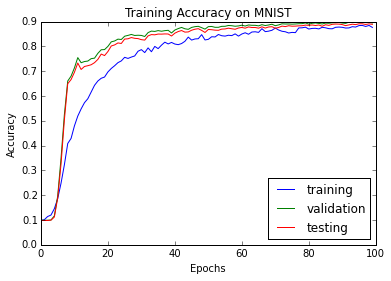

In [18]:
print confusion
print confusion_valid
print confusion_test
plt.plot(range(num_epochs), acc, label='training')
plt.plot(range(num_epochs), valid_acc, label='validation')
plt.plot(range(num_epochs), test_acc, label='testing')
plt.title('Training Accuracy on MNIST')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc=4)
plt.show()

In [19]:
import theano
import theano.tensor as T # Theano subpackage where many useful symbols are included.

In [20]:
import lasagne
from lasagne.layers import InputLayer, DenseLayer, get_output, get_all_params
from lasagne.init import Normal, Constant
from lasagne.nonlinearities import rectify, softmax

In [21]:
batch_size = 100
num_class = 10
learning_rate = 0.1

data = np.load('mnist.npz')
num_classes = 10
x_train = data['X_train'].astype('float32')
targets_train = data['y_train'].astype('int32')

x_valid = data['X_valid'].astype('float32')
targets_valid = data['y_valid'].astype('int32')

x_test = data['X_test'].astype('float32')
targets_test = data['y_test'].astype('int32')


In [22]:

l_in = InputLayer(shape=(batch_size, x_train.shape[1]))
l_hid = DenseLayer(incoming=l_in, num_units=100, nonlinearity=rectify)
l_out = DenseLayer(incoming=l_hid, num_units=num_class, nonlinearity=softmax)
#l_hid = DenseLayer(incoming=l_in, num_units=100, W=Normal(1,0), b=Constant(0.), nonlinearity=rectify)
#l_out = DenseLayer(incoming=l_hid, num_units=10, W=Normal(1,0), b=Constant(0.), nonlinearity=softmax)

In [23]:
from lasagne.objectives import categorical_crossentropy
from lasagne.updates import sgd

In [24]:
sym_x = T.matrix('sym_x') # a symbolic variable taking on the value of a input batch.
sym_t = T.ivector('sym_t') # a symbolic variable taking on the value of the target batch.

# Get network output
train_out = lasagne.layers.get_output(l_out, sym_x, deterministic=False)
eval_out = lasagne.layers.get_output(l_out, sym_x, deterministic=True)


# Get list of all trainable parameters in the network.
all_params = lasagne.layers.get_all_params(l_out, trainable=True)

cost = T.nnet.categorical_crossentropy(train_out+1e-8, sym_t).mean()
# Let Theano do its magic and get all the gradients we need for training
all_grads = T.grad(cost, all_params)


# Set the update function for parameters 
# you might wan't to experiment with more advanded update schemes like rmsprob, adadelta etc.
updates = lasagne.updates.sgd(all_grads, all_params, learning_rate=learning_rate)




f_eval = theano.function([sym_x],
                     eval_out, on_unused_input='warn')

f_train = theano.function([sym_x, sym_t],
                          [cost],
                          updates=updates, on_unused_input='warn')


In [25]:
    #Test the forward pass
x = np.random.normal(0,1, (45, 28*28)).astype('float32') #dummy data

model = lasagne.layers.get_output(l_in, sym_x)
out = model.eval({sym_x:x}) #this could also include mask etc if used
print("l_in", out.shape)


model = lasagne.layers.get_output(l_hid, sym_x)
out = model.eval({sym_x:x}) #this could also include mask etc if used
print("l_hid", out.shape)


model = lasagne.layers.get_output(l_out, sym_x)
out = model.eval({sym_x:x}) #this could also include mask etc if used
print("l_out", out.shape)


('l_in', (45, 784))
('l_hid', (45, 100))
('l_out', (45, 10))


In [26]:
from confusionmatrix import ConfusionMatrix
batch_size = 100
num_epochs = 10
learning_rate = 0.1
num_samples_train = x_train.shape[0]
num_batches_train = num_samples_train // batch_size
num_samples_valid = x_valid.shape[0]
num_batches_valid = num_samples_valid // batch_size

train_acc, train_loss = [], []
valid_acc, valid_loss = [], []
test_acc, test_loss = [], []
cur_loss = 0
loss = []
for epoch in range(num_epochs):
    #Forward->Backprob->Update params
    cur_loss = 0
    for i in range(num_batches_train):
        idx = range(i*batch_size, (i+1)*batch_size)
        x_batch = x_train[idx]
        target_batch = targets_train[idx]    
        batch_loss = f_train(x_batch,target_batch) #this will do the complete backprob pass
        cur_loss += batch_loss[0]
    loss += [cur_loss/batch_size]
    
    confusion_valid = ConfusionMatrix(num_classes)
    confusion_train = ConfusionMatrix(num_classes)

    for i in range(num_batches_train):
        idx = range(i*batch_size, (i+1)*batch_size)
        x_batch = x_train[idx]
        targets_batch = targets_train[idx]
        net_out = f_eval(x_batch)   
        preds = np.argmax(net_out, axis=-1) 
        confusion_train.batch_add(targets_batch, preds)

    confusion_valid = ConfusionMatrix(num_classes)
    for i in range(num_batches_valid):
        idx = range(i*batch_size, (i+1)*batch_size)
        x_batch = x_valid[idx]
        targets_batch = targets_valid[idx]
        net_out = f_eval(x_batch)   
        preds = np.argmax(net_out, axis=-1) 
        
        confusion_valid.batch_add(targets_batch, preds)
    
    train_acc_cur = confusion_train.accuracy()
    valid_acc_cur = confusion_valid.accuracy()

    
    print "Epoch %i : Train Loss %e , Train acc %f,  Valid acc %f " \
    % (epoch+1, loss[-1], train_acc_cur, valid_acc_cur)

Epoch 1 : Train Loss 2.339797e+00 , Train acc 0.909280,  Valid acc 0.921100 
Epoch 2 : Train Loss 1.336328e+00 , Train acc 0.932020,  Valid acc 0.939300 
Epoch 3 : Train Loss 1.074890e+00 , Train acc 0.944860,  Valid acc 0.948300 
Epoch 4 : Train Loss 9.037619e-01 , Train acc 0.953280,  Valid acc 0.955500 
Epoch 5 : Train Loss 7.817803e-01 , Train acc 0.960000,  Valid acc 0.959500 
Epoch 6 : Train Loss 6.893804e-01 , Train acc 0.965040,  Valid acc 0.962000 
Epoch 7 : Train Loss 6.165814e-01 , Train acc 0.968560,  Valid acc 0.964700 
Epoch 8 : Train Loss 5.579831e-01 , Train acc 0.971660,  Valid acc 0.967600 
Epoch 9 : Train Loss 5.092940e-01 , Train acc 0.974320,  Valid acc 0.969800 
Epoch 10 : Train Loss 4.682522e-01 , Train acc 0.976380,  Valid acc 0.970800 
